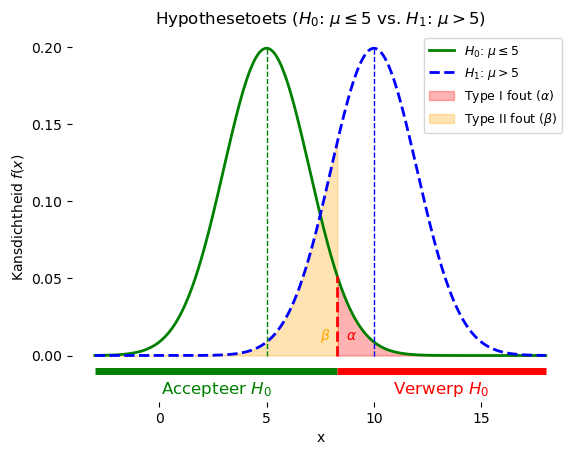

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the distributions
mu_null = 5      # Mean under the null hypothesis
mu_alt = 10      # Mean under the alternative hypothesis
sigma = 2        # Standard deviation (given)
alpha = 0.05     # Significance level

fig, ax = plt.subplots()

# Calculate the Kritieke waarde (z_alpha)
critical_value = norm.ppf(1 - alpha, loc=mu_null, scale=sigma)

# Define the x range for plotting
x = np.linspace(mu_null - 4*sigma, mu_alt + 4*sigma, 1000)

# Plot the null hypothesis distribution (solid line)
ax.plot(x, norm.pdf(x, mu_null, sigma), color='green', label=r'$H_0$: $\mu \leq 5$', lw=2)

# Plot the alternative hypothesis distribution (dashed line)
ax.plot(x, norm.pdf(x, mu_alt, sigma), color='blue', linestyle='dashed', label=r'$H_1$: $\mu > 5$', lw=2)

# Shade the critical region (right of the critical value) for Type I error (alpha)
ax.fill_between(x, 0, norm.pdf(x, mu_null, sigma), where=(x > critical_value), 
                 color='red', alpha=0.3, label=r'Type I fout ($\alpha$)')

# Shade the Type II error region (where we fail to reject H0 when H1 is true)
ax.fill_between(x, 0, norm.pdf(x, mu_alt, sigma), where=(x <= critical_value), 
                 color='orange', alpha=0.3, label=r'Type II fout ($\beta$)')

# Plot the mean lines
ax.plot([mu_null, mu_null], [0, norm.pdf(mu_null, mu_null, sigma)], color='green', linestyle='--', lw=1)
ax.plot([mu_alt, mu_alt], [0, norm.pdf(mu_alt, mu_alt, sigma)], color='blue', linestyle='--', lw=1)

# Plot the critical value  line
ax.plot([critical_value, critical_value], [0, norm.pdf(critical_value, mu_null, sigma)], color='red', linestyle='--', lw=2)

# Annotations for clarity
ax.text(critical_value + 0.4, 0.01, r'$\alpha$', color='red')
ax.text(critical_value - 0.8, 0.01, r'$\beta$', color='orange')

# Draw horizontal lines indicating the regions
y_pos = -0.01  # Position for the horizontal line

# Accept region (left of the Kritieke waarde)
ax.hlines(y_pos, mu_null - 4 * sigma, critical_value, color='green', linewidth=5)

# Reject region (right of the Kritieke waarde)
ax.hlines(y_pos, critical_value, mu_alt + 4 * sigma, color='red', linewidth=5)

# Optional: Add text labels for the regions
ax.text((mu_null - 4 * sigma + critical_value) / 2, y_pos - 0.015, 'Accepteer $H_0$', color='green', fontsize=12, ha='center')
ax.text((critical_value + mu_alt + 4 * sigma) / 2, y_pos - 0.015, 'Verwerp $H_0$', color='red', fontsize=12, ha='center')

# Titles and labels
ax.set_title("Hypothesetoets ($H_0$: $\mu \leq 5$ vs. $H_1$: $\mu > 5$)")
ax.set_xlabel("x")
ax.set_ylabel("Kansdichtheid $f(x)$")
ax.legend(fontsize=9)

# Set limits to better visualize the horizontal lines and adjust the plot
ax.set_ylim(bottom=-0.03)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
fig.show()